<img style="float: left;;" src='../Imagenes/iteso.jpg' width="120" height="120"/></a>

## <center> <font color= #000047> DEPARTAMENTO DE MATEMÁTICAS Y FÍSICA </font> </center>
## <center> <font color= #000047> Ciencia de Datos e Inteligencia de Negocios </font> </center>
## <center> <font color= #000047> EXAMEN 1 : Análisis de Datos y Medidas de Similitud </font> </center>
## <center> <font color= #000047> Tipo: A </font> </center>

        

<div class="alert alert-danger" style="margin: 10px"><strong>NOTA IMPORTANTE!</strong> Asegúrese de escribir su nombre, y el código en las celdas comentadas. Si hizo uso de elementos externos como notas, imagenes, pdfs, o su librería, estos documentos tendrán que adjuntarse en su examen.</div>

<h1> José Eddie Aguilar Ceballos </h1>
<hr>   

<h2>Instrucciones</h2>

- Lea detenidamente los reactivos y responda con claridad. Si se requiere hacer uso de más hojas para la realización de cálculos, es necesario que se adjunten a este archivo cuando se haga entrega del examen. Es necesario adjuntar las diferentes librerías o código que se utilice para la realización del examen.

- Responda de manera ordenada los reactivos.

- Por cada respuesta de cada reactivo se calificará __código, figuras y comentarios__.


<h2>Tabla de Reactivos</h2>

1. [Reactivo 1 (1 ptos)](#Problema1)
2. [Reactivo 2 (1 ptos)](#Problema2)
3. [Reactivo 3 (1 ptos)](#Problema3)
3. [Reactivo 4 (2.5 ptos)](#Problema4)
3. [Reactivo 5 (2.5  ptos)](#Problema5)
3. [Reactivo 6 (1 ptos)](#Problema6)
3. [Reactivo 7 (1 ptos)](#Problema7)

<hr>   

#### Considere el dataframe que se encuentra en "Data/Airbn_Data.csv", cargue el dataframe (pd.read_csv()) y responda los siguientes reactivos.

In [155]:
import pandas as pd
from CDIN import CDIN as cd

data = pd.read_csv('../Data/Airbnb_Data.csv')

C:\Users\AgJo413\AppData\Local\Temp\ipykernel_17940\3245453675.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/Airbnb_Data.csv')


<hr>   

### Reactivo 1 (1ptos) <a name="Problema1"></a> 

Realizar un reporte de calidad de datos y comente sus resultados.

**Respuesta:**

In [156]:
d_data = cd.dqr(data)
d_data

,Nombre_Columnas,Tipo_Datos,Valores_Presentes,Valores_Faltantes,Valores_Unicos,Max_Values,Min_Values,Mean,Std,Categorical,Categories
id,id,int64,102599,0,102058,5.736742e+07,1.001254e+06,2.914623e+07,1.625751e+07,False,NaN
NAME,NAME,object,102349,250,61281,NaN,NaN,NaN,NaN,True,Too much categories
host id,host id,int64,102599,0,102057,9.876313e+10,1.236005e+08,4.925411e+10,2.853900e+10,False,NaN
host_identity_verified,host_identity_verified,object,102310,289,2,NaN,NaN,NaN,NaN,True,"[unconfirmed, verified, nan]"
host name,host name,object,102193,406,13190,NaN,NaN,NaN,NaN,True,Too much categories
neighbourhood group,neighbourhood group,object,102570,29,7,NaN,NaN,NaN,NaN,True,"[Brooklyn, Manhattan, brookln, manhatan, Queen..."
neighbourhood,neighbourhood,object,102583,16,224,NaN,NaN,NaN,NaN,True,Too much categories
lat,lat,float64,102591,8,21991,4.091697e+01,4.049979e+01,4.072800e+01,5.600000e-02,False,NaN
long,long,float64,102591,8,17774,-7.370522e+01,-7.424984e+01,-7.395000e+01,5.000000e-02,False,NaN
country,country,object,102067,532,1,NaN,NaN,NaN,NaN,True,"[United States, nan]"


Como podemos ver tenemos un dataset de 102599 datos y 26 columnas, de las cuales 15 son categoricas y 11 no. Además de eso vemos que casi dos terceras partes de las columnas tienen un porcentaje de datos vacios algo relevante. A pesar de esto, la columna id no tiene ningún dato faltante debido a que es el dato que identifica a cada fila, sin embargo, vemos que extrañamente hay valores del id repetido a pesar de que debería ser un valor único. 


### Reactivo 2 (1ptos) <a name="Problema2"></a> 

Mostrar las columnas categóricas ordinales, mostrar las columnas categóricas nominales, Mostrar las columnas continuas, Mostrar las columnas binarias.

**Respuesta:**

In [157]:
print("Columnas categóricas: {}".format(cd.get_categoricos_non_binaries(data)[0]))
print("\nColumnas continuas: {}".format(cd.get_cuantitativos(data)[0]))
print("\nColumnas binarias: {}".format(cd.get_binaries(data)[0]))

Columnas categóricas: ['NAME', 'host name', 'neighbourhood group', 'neighbourhood', 'country', 'country code', 'cancellation_policy', 'room type', 'price', 'service fee', 'last review', 'house_rules', 'license']

Columnas continuas: Index(['id', 'host id', 'lat', 'long', 'Construction year', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

Columnas binarias: ['host_identity_verified', 'instant_bookable']


Columnas categóricas: 
- Ordinales: last review, cancellation_policy
- Nominales: name, host name, neighnourhood group, neighbourhood, country, country code, room type, house_rules

Columnas continuas: 
- price, service fee 


### Reactivo 3 (1ptos) <a name="Problema3"></a> 

Usando el reporte de calidad de datos obtenido, realizar una limpieza de datos, dejar sólo en el data frame las columnas que contengan el 80% o más de valores presentes. Rellenar los datos "NaN" (missing) según el tipo de dato (categoricos --> unk, continuos --> promedio).

**Respuesta:**

In [158]:
d_data = cd.dqr(data)
comp = d_data[["Valores_Presentes", "Valores_Faltantes"]]
comp["Porcentaje"] = comp["Valores_Presentes"]/(comp["Valores_Presentes"] + comp["Valores_Faltantes"])


qlt_col = []
for i, row in comp.iterrows():
    if row["Porcentaje"] < .8:
        qlt_col.append(row.name)
        
data = data.drop(qlt_col, axis="columns")

for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].fillna("unknown")
    else:
        data[i] = data[i].fillna(data[i].mean())

comp
        

C:\Users\AgJo413\AppData\Local\Temp\ipykernel_17940\131854193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp["Porcentaje"] = comp["Valores_Presentes"]/(comp["Valores_Presentes"] + comp["Valores_Faltantes"])


,Valores_Presentes,Valores_Faltantes,Porcentaje
id,102599,0,1.000000
NAME,102349,250,0.997563
host id,102599,0,1.000000
host_identity_verified,102310,289,0.997183
host name,102193,406,0.996043
neighbourhood group,102570,29,0.999717
neighbourhood,102583,16,0.999844
lat,102591,8,0.999922
long,102591,8,0.999922
country,102067,532,0.994815


In [159]:
data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.210000,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.380000,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unknown,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,unknown,1.374022,5.0,1.0,352.0
3,1002755,unknown,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,$368,$74,30.0,270.0,7/5/2019,4.640000,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.100000,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,2003.0,$844,$169,1.0,0.0,unknown,1.374022,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,2016.0,$837,$167,1.0,1.0,7/6/2015,0.020000,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,2009.0,$988,$198,3.0,0.0,unknown,1.374022,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,2015.0,$546,$109,2.0,5.0,10/11/2015,0.100000,3.0,1.0,386.0


### Reactivo 4 (2.5ptos) <a name="Problema4"></a> 

Realizar una limpieza de datos en las columnas (2pts): 
> 4.1 Eliminar la columna "license"

> 4.2 La columna **"service fee"** contiene un caracter de símbolo de pesos qué se encuentra antes del valor numérico, esto hace que esta columna se considere como 'Object'. Esta columna deberá de ser una columna continua. Realizar una limpieza eliminando el caracter de pesos y convertirlo a un dato continuo. **Hint:** realizar un [cast](https://thedataschools.com/python/casting/)(float)

> 4.3 La columna **"last review"** debe de tener el formato : **xx/xx/xxxx, ejemplo 7/5/2019 ----> 07/05/2019**, realizar una función para ralizar esta conversión y aplicar esta función a la columna "last review" (**Hint:** utilice el método apply()).

> 4.4 La columna **"NAME"** debe de estar en Minúsculas, cambiar el caracter '&' por ' and '

> 4.5 La columna **"host id"** debe de contener 11 dígitos, cualquier muestra que contenga más o menos de 11 dígitos será una muestra invalida y se tendrá que eliminar.

**Respuesta:**

In [160]:
def cast_float(x):
  if x == "unknown":
    x = None
  else:
    x = float(x)
  return x

def format_date(x):
  if x != "unknown":
    x = pd.to_datetime(x, format='%m/%d/%Y')
    x = x.strftime('%d/%m/%Y')
  return x

def format_host(x):
  if len(str(x)) != 11:
    x = 0
  return x

try:
  data = data.drop(['license'],  axis='columns')
except:
  print("Column license does not exist anymore")
  
data["service fee"] = data["service fee"].apply(cd.remove_punctuation)
data["service fee"] = data["service fee"].apply(cast_float)
data["service fee"] = data["service fee"].fillna(data["service fee"].mean())
data["last review"] = data["last review"].apply(format_date)
data.rename(columns={'NAME': 'name'}, inplace=True)
data["name"] = data["name"].apply(cd.replace_text, args = ('&','and'))
data["host id"] = data['host id'].apply(format_host)

data = data.loc[data['host id'] != 0]

data

Column license does not exist anymore


,id,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean and quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,193.0,10.0,9.0,19/10/2021,0.210000,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,28.0,30.0,45.0,21/05/2022,0.380000,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unknown,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,124.0,3.0,0.0,unknown,1.374022,5.0,1.0,352.0
3,1002755,unknown,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,$368,74.0,30.0,270.0,05/07/2019,4.640000,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,41.0,10.0,9.0,19/11/2018,0.100000,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,2003.0,$844,169.0,1.0,0.0,unknown,1.374022,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,2016.0,$837,167.0,1.0,1.0,06/07/2015,0.020000,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,2009.0,$988,198.0,3.0,0.0,unknown,1.374022,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,2015.0,$546,109.0,2.0,5.0,11/10/2015,0.100000,3.0,1.0,386.0


### Reactivo 5 (2.5ptos) <a name="Problema5"></a> 

Obtener 5 insights de los datos después de haber hecho la limpieza: 

> 5.1 ¿Cuál es el rango de tiempo que cubre el dataset?

> 5.2 ¿Cuántos países diferentes se toman en cuenta en el dataset?

> 5.3 ¿Cuál es la distribución de salarios en el dataset por 'neighbourhood group'?

> 5.4 ¿Qué vecindario ('neighbourhood group') tiene el mayor número de hosts?

> 5.5 ¿Cuáles y cuántos son los diferentes tipos de cuartos disponibles en el dataset?
 
**Respuesta:**

El rango de tiempo es de 01/01/2013 a 31/12/2021
Número de paises en el dataset: 1
El vecindario con mayor número de hosts es Manhattan 
Hay 4 tipos de cuartos: Private room, Entire home/apt, Shared room, Hotel room, 


C:\Users\AgJo413\AppData\Local\Temp\ipykernel_17940\4209957990.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("neighbourhood group").sum()["service fee"].plot(kind="bar", title="Distribución de salarios")


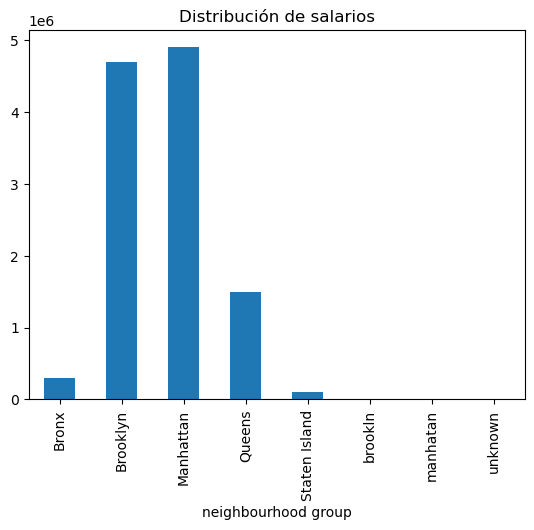

In [161]:
fechas = data["last review"].sort_values().unique()
print("El rango de tiempo es de {} a {}".format(fechas[0], fechas[-2]))
print("Número de paises en el dataset: {}".format(len(data["country"].unique())-1))
data.groupby("neighbourhood group").sum()["service fee"].plot(kind="bar", title="Distribución de salarios")
print("El vecindario con mayor número de hosts es {} ".format(data.groupby('neighbourhood group').count().sort_values("id", ascending=False).iloc[0].name))
cuartos = ""
for i in data["room type"].unique():
    cuartos += i + ", "
print("Hay {} tipos de cuartos: {}".format(len(data["room type"].unique()), cuartos))

### Reactivo 6 (1ptos) <a name="Problema6"></a> 

Filtre el datasete que se obtenga del **Reactivo 4** con las siguientes columnas: **host id','lat', 'long', 'Construction year', 'service fee', 'reviews per month', 'review rate number','availability 365']**. Aplicar el método **set_index** a la columna 'host id' de tal forma que el indice del dataframe sea 'host_id'. Apartir del dataset obtenido, cree una matriz de similitud por distancia euclideana estandarizada.

**Respuesta:**

In [162]:
mat = data[['host id','lat', 'long', 'Construction year', 'service fee', 'reviews per month', 'review rate number','availability 365']].set_index(['host id'])
mats = cd.pdistance_matrix(mat[:100], "seuclidean")
mats

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,4.286546,4.866923,5.769076,4.674101,2.988754,3.497494,2.612650,5.140469,4.145170,...,4.133710,3.544006,3.600068,3.975117,3.969007,5.305749,3.743020,5.780057,3.871197,3.454257
1,4.286546,0.000000,3.313690,4.844670,2.375793,2.543688,2.548622,3.712730,4.455233,2.691212,...,3.475647,3.665175,3.893835,3.575216,2.947725,3.121199,4.103690,5.340160,2.563975,4.012005
2,4.866923,3.313690,0.000000,4.380789,2.832270,3.185914,3.929533,3.376794,4.159757,2.515949,...,3.982656,5.624252,3.538345,2.904475,4.153160,2.215611,5.391592,5.363928,4.609110,4.116255
3,5.769076,4.844670,4.380789,0.000000,5.352513,4.783084,5.003447,5.146827,3.557070,4.878555,...,4.761711,6.493497,4.389851,5.426709,3.351829,5.257187,6.154180,4.567828,4.551017,4.504338
4,4.674101,2.375793,2.832270,5.352513,0.000000,2.462659,3.219281,4.137218,4.996258,2.731096,...,3.069251,4.550462,3.381953,2.817934,4.253577,1.492579,4.765922,5.097766,3.266217,3.374054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.305749,3.121199,2.215611,5.257187,1.492579,2.749174,4.149593,4.584691,4.967938,2.604522,...,4.145155,5.498546,4.076688,3.039196,4.492540,0.000000,5.438921,5.566629,4.122303,4.229948
96,3.743020,4.103690,5.391592,6.154180,4.765922,3.586636,5.148519,3.874638,3.648851,5.216317,...,4.507665,2.914274,4.325593,3.440332,3.860546,5.438921,0.000000,4.271630,3.693039,4.613826
97,5.780057,5.340160,5.363928,4.567828,5.097766,5.057146,5.975198,5.011465,3.197595,6.311242,...,3.705295,5.776796,3.370101,4.319457,4.686722,5.566629,4.271630,0.000000,4.385889,3.903724
98,3.871197,2.563975,4.609110,4.551017,3.266217,2.539408,3.401490,4.122812,4.418092,4.191809,...,3.432281,4.030090,3.498114,4.292726,2.312513,4.122303,3.693039,4.385889,0.000000,3.468528


### Reactivo 7 (1ptos) <a name="Problema7"></a> 

 Obtenga el top 5 de **'host_id'** más parecidas al **'host_id' = '92037596077'**
 
**Respuesta:**

In [163]:
mat # 4

,lat,long,Construction year,service fee,reviews per month,review rate number,availability 365
host id,,,,,,,
80014485718,40.64749,-73.97237,2020.0,193.0,0.210000,4.0,286.0
52335172823,40.75362,-73.98377,2007.0,28.0,0.380000,4.0,228.0
78829239556,40.80902,-73.94190,2005.0,124.0,1.374022,5.0,352.0
85098326012,40.68514,-73.95976,2005.0,74.0,4.640000,4.0,322.0
92037596077,40.79851,-73.94399,2009.0,41.0,0.100000,3.0,289.0
...,...,...,...,...,...,...,...
12312296767,40.70862,-73.94651,2003.0,169.0,1.374022,3.0,227.0
77864383453,40.80460,-73.96545,2016.0,167.0,0.020000,2.0,395.0
69050334417,40.67505,-73.98045,2009.0,198.0,1.374022,5.0,342.0


In [164]:
print("5 hosts más parecidos:")
i = (mats.iloc[4].sort_values(ascending = True)[1:6]).index
mat.iloc[i]

5 hosts más parecidos:


,lat,long,Construction year,service fee,reviews per month,review rate number,availability 365
host id,,,,,,,
62028601494,40.83927,-73.94281,2007.0,61.0,0.600000,3.279106,393.000000
79805143117,40.79685,-73.94872,2013.0,56.0,1.374022,3.000000,347.000000
80369762211,40.81305,-73.95466,2007.0,102.0,1.420000,3.279106,169.000000
18824631834,40.80316,-73.96545,2008.0,121.0,0.430000,4.000000,163.000000
11468499446,40.76865,-73.95058,2007.0,23.0,1.500000,4.000000,141.133254
